## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

The Data used is the Twitter Archive of the @We_rate_Dogs

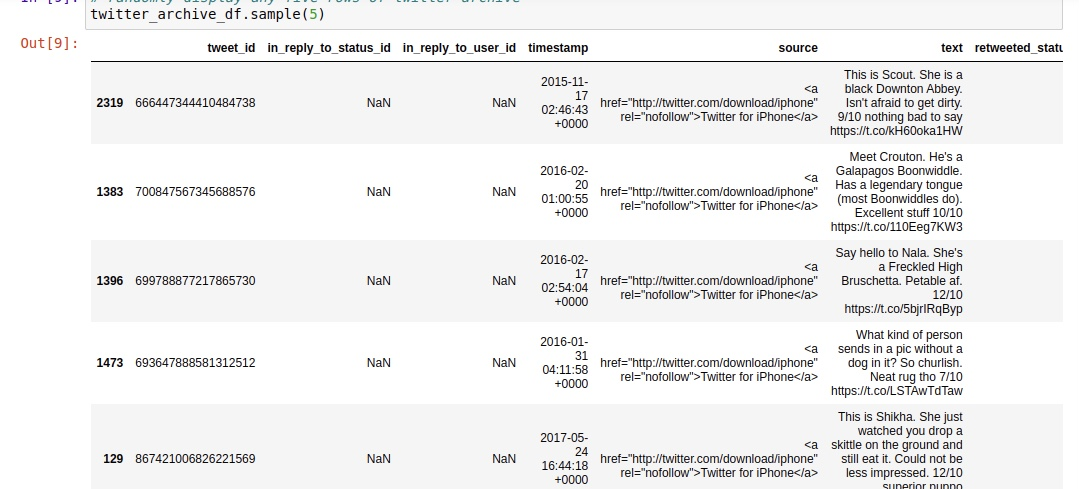

Fig. 1.1 The Data gathered from the twiiter archive of the @We_rate_dogs page displaying 5 random rows

### Insights:
1. Among the stages(doggo, puppo, pupper, and floofer), which has the highest entries?

2. What is the correlation between retweet count and favorite count of the dogs images posted on twitter? 

3. From the numerator, which number has the highest entry?

### Gather

I imported the pandas library and read the **twitter_archive** dataset which was manually downloded from the classroom. I then used the **Requests** library to download the tweet_image predictions **(image_predictions.tsv)** dataset and read it to the notebook. I then created a **twitter developer account** which I used to generate (API Key and the Access Key) to be able to query additional data **(tweet_id, favorite_count, and retweet_count)** via **Tweepy an API for Twitter**. The API data came in as a **json** file which I read it line by line and created a **pandas DataFrame** and then read it to the notebook as well.

### Assessment

I used both the **Visual** and the **Programatic** assesssments approaches and found these **Quality** and **Tidiness** issues:

#### Quality issues

1. **Missing** values in the **twitter_archive_df** columns(**in_reply_to_status**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, and **retweeted_status_time_stamp**)

2. **Time stamp data type** in **twitter_archive_df** should be **date_time** not **object**

3. **p1_conf, p2_conf, and p3_conf data types** in **image_predictions** table should be **object** not **float** since we are not computing them  

4. **Nulls** represented as **None** in the **stages** columns

5. The **rating denominator** of the **twitter_archive_df** some are **inconsistence**. Some greater than 10 and one is 0

6. **Nulls** represented as **None** in the **name column** of the **twitter_archieve table**
7. In the **twitter_archive table**, some **names** are a, the, etc, those are not actual names but part of text in the text column
8. Missing values in the retweet_count, favorite_count, and stage column in the clean_twittwer_archive table
9. The twitter_archive table contain retweeted tweets
10. The clean_twitter_archive stage column, some are having two values in one column ('doggo,floofer', 'doggo,pupper', 'doggo,puppo')


#### Tidiness issues
1. **tweet_id column** in **twitter_archive_df** table duplicated in **image_predictions_df and tweet_df tables**  

2. The **doggo**, **floofer**, **pupper**, and **puppo** columns in the twitter_archive_df should form one **'Stage'** column
3. **Retweet count** and **favorite count** in the **tweet_df table** should be part of **twitter archive**

### Cleaning

Before I started cleaning, I copied all the three datasets using the copy() method. Then I:
1. **Masked the twitter_archive table to only contain all rows where retweet_id are empty.**
2. **Dropped the columns that have missing values in the  twitter_archive_df columns(in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_time_stamp) using pd.drop_null() method**

3. **Replaced the None values with Numpy's np.nan in the (doggo, puppo, pupper, and floofer) columns**

4. **Used the pandas stack and groupby method and merged the columns (doggo, floofer, pupper, and puppo) to 'Stage' and created a dog stage column then I dropped the (doggo, puppo, pupper, and floofer) columns**

5. **Used the replace method to replace the 'doggo,floofer' with floofer (Because I checked the text column for the 'doggo,floofer' and found out that the stage was actually floofer), and I replaced the ('doggo,pupper' and 'doggo,puppo') with np.nan (because in the text column it neither stated they are doggo nor pupper)**

6. **Some names in the name column are (a, the, such, an, this etc) because the text started with those words. So I picked those names and replaced them with np.nan and then I drooped the name column**

7. **Merged the retweet_count and favorite_count columns to the tweet_df table, joining on tweet_id, and dropped all the missing rows on the twitter_archive table**

8. **Used for loop to loop through the clean_twitter_archive rating_denominator column then I used pandas replace method and replaced those values that were greater than and less than 10 with 10**

9. **Used the pandas to_datetime() module and converted the time_stamp data type to datetime**.

10. **Subset the image_prediction_df using the p1_dog == True, to get the images that are dogs. Since the p1_dog is the algorithm's number one prediction and has the most accurate prediction**

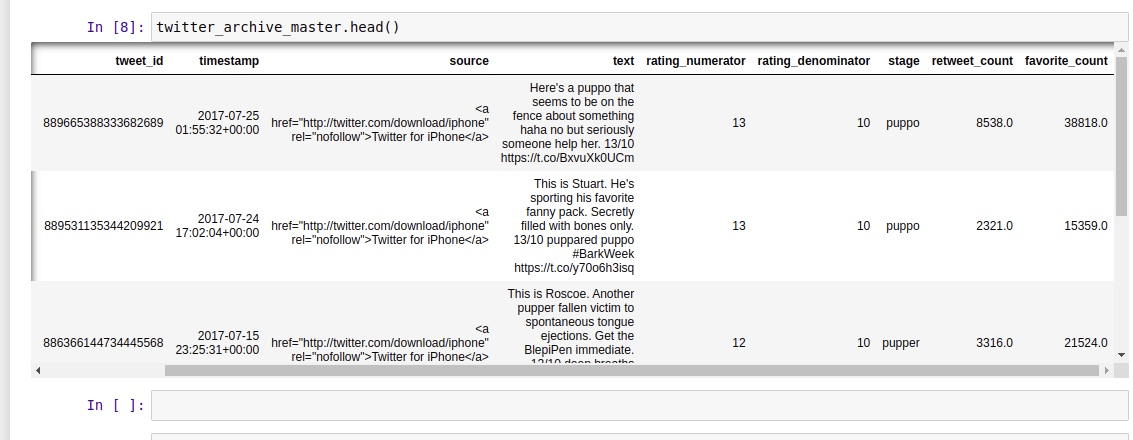

Fig. 1.2 Cleaned Twitter Archive data. Showing the first 5 rows

* To answer the first question(Among the stages(doggo, puppo, pupper, and floofer), which has the highest entries?). I used the value_counts method on the cleaned master dataFrame to dsiplay the value counts of the stages. Before the cleaning, I could not display the value counts of the stages but after the cleaning I can do that.

* To answer the second question(What is the correlation between retweet count and favorite count of the dogs images posted on twitter?). I checked the correlation between the favorit_count and the retweet_count olumns of the data and got the answer to be **0.9681789249155268**

* The third question( From the numerator, which number has the highest entry?). I plot a bar plot for the rating_numerator column and find out that the numbers 10-13 has the highest rating_numerator above 70. The figure below show the bar plot of the rating_numerator 


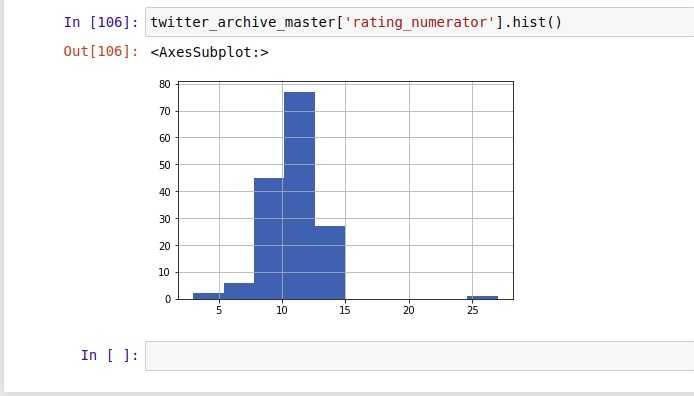